In [123]:
# modules
import pandas as pd
%matplotlib inline 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
sns.set(style='darkgrid', rc={'axes.facecolor':'#CAF1DE'})

In [125]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [156]:
print('Null values:',df.isna().sum())

Null values: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [157]:
print(df.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

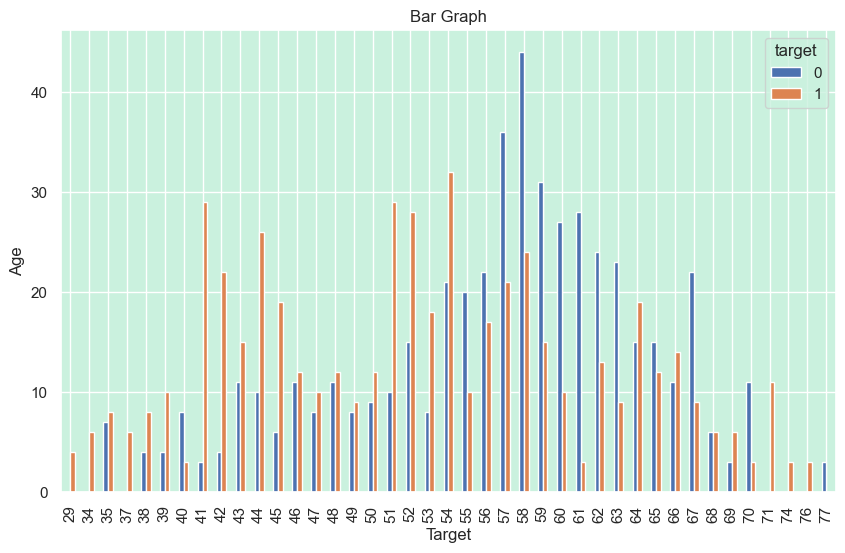

In [126]:
pd.crosstab(df['age'], df['target']).plot(kind='bar', figsize=(10,6))
plt.title('Bar Graph')
plt.ylabel('Age')
plt.xlabel('Target')
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [128]:
Y = df.target.values

In [129]:
X = df.drop('target', axis = 1)
X = (X - np.min(X))/(np.max(X)-np.min(X))
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.092199,0.001773,0.000000,0.221631,0.375887,0.000000,0.001773,0.297872,0.000000,0.001773,0.003546,0.003546,0.005319
1,0.093972,0.001773,0.000000,0.248227,0.359929,0.001773,0.000000,0.274823,0.001773,0.005496,0.000000,0.000000,0.005319
2,0.124113,0.001773,0.000000,0.257092,0.308511,0.000000,0.001773,0.221631,0.001773,0.004610,0.000000,0.000000,0.005319
3,0.108156,0.001773,0.000000,0.262411,0.359929,0.000000,0.001773,0.285461,0.000000,0.000000,0.003546,0.001773,0.005319
4,0.109929,0.000000,0.000000,0.244681,0.521277,0.001773,0.001773,0.187943,0.000000,0.003369,0.001773,0.005319,0.003546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.104610,0.001773,0.001773,0.248227,0.391844,0.000000,0.001773,0.290780,0.001773,0.000000,0.003546,0.000000,0.003546
1021,0.106383,0.001773,0.000000,0.221631,0.457447,0.000000,0.000000,0.250000,0.001773,0.004965,0.001773,0.001773,0.005319
1022,0.083333,0.001773,0.000000,0.195035,0.487589,0.000000,0.000000,0.209220,0.001773,0.001773,0.001773,0.001773,0.003546
1023,0.088652,0.000000,0.000000,0.195035,0.450355,0.000000,0.000000,0.281915,0.000000,0.000000,0.003546,0.000000,0.003546


In [130]:
# splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

## Logistic Regression

In [131]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [132]:
y_pred1 = model1.predict(X_test)
y_pred1

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [133]:

cm1 = confusion_matrix(Y_test, y_pred1)

accuracy1 = accuracy_score(Y_test, y_pred1)
precision1 = precision_score(Y_test, y_pred1)
recall1 = recall_score(Y_test, y_pred1)
f1 = f1_score(Y_test, y_pred1)

print("Confusion Matrix:")
print(cm1)

Confusion Matrix:
[[ 94  51]
 [ 34 129]]


In [134]:

print('Logistic Regression Accuracy:',accuracy1)
print("Logistic Regression Precision:", precision1)
print("Logistic Regression Recall:", recall1)
print("Logistic Regression F1-score:", f1)

Logistic Regression Accuracy: 0.724025974025974
Logistic Regression Precision: 0.7166666666666667
Logistic Regression Recall: 0.7914110429447853
Logistic Regression F1-score: 0.7521865889212828


## KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier

k = 5  
model2 = KNeighborsClassifier(n_neighbors=k)
model2.fit(X_train, Y_train)

y_pred2 = model2.predict(X_test)

In [136]:

cm2 = confusion_matrix(Y_test, y_pred2)

accuracy2 = accuracy_score(Y_test, y_pred2)
precision2 = precision_score(Y_test, y_pred2)
recall2 = recall_score(Y_test, y_pred2)
f2 = f1_score(Y_test, y_pred2)

print("Confusion Matrix:")
print(cm2)


Confusion Matrix:
[[114  31]
 [ 48 115]]


In [137]:

print('KNN Accuracy:',accuracy2)
print("KNN Precision:", precision2)
print("KNN Recall:", recall2)
print("KNN F1-score:", f2)

KNN Accuracy: 0.7435064935064936
KNN Precision: 0.7876712328767124
KNN Recall: 0.7055214723926381
KNN F1-score: 0.744336569579288


## SVM - Support Vector Machines

In [138]:
from sklearn.svm import SVC

model3 = SVC(kernel='linear') 
model3.fit(X_train, Y_train)

y_pred3 = model3.predict(X_test)


In [139]:

cm3 = confusion_matrix(Y_test, y_pred3)

accuracy3 = accuracy_score(Y_test, y_pred3)
precision3 = precision_score(Y_test, y_pred3)
recall3 = recall_score(Y_test, y_pred3)
f3 = f1_score(Y_test, y_pred3)

print("Confusion Matrix:")
print(cm3)


Confusion Matrix:
[[ 87  58]
 [ 33 130]]


In [140]:

print('SVM Accuracy:',accuracy3)
print("SVM Precision:", precision3)
print("SVM Recall:", recall3)
print("SVM F1-score:", f3)

SVM Accuracy: 0.7045454545454546
SVM Precision: 0.6914893617021277
SVM Recall: 0.7975460122699386
SVM F1-score: 0.7407407407407407


## Gaussian Naive Bayes

In [141]:

from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(X_train, Y_train)

y_pred4 = model4.predict(X_test)


In [142]:

cm4 = confusion_matrix(Y_test, y_pred4)

accuracy4 = accuracy_score(Y_test, y_pred4)
precision4 = precision_score(Y_test, y_pred4)
recall4 = recall_score(Y_test, y_pred4)
f4 = f1_score(Y_test, y_pred4)

print("Confusion Matrix:")
print(cm4)


Confusion Matrix:
[[118  27]
 [ 21 142]]


In [143]:

print('Naive Bayes Accuracy:',accuracy4)
print("Naive Bayes Precision:", precision4)
print("Naive Bayes Recall:", recall4)
print("Naive Bayes F1-score:", f4)

Naive Bayes Accuracy: 0.8441558441558441
Naive Bayes Precision: 0.8402366863905325
Naive Bayes Recall: 0.8711656441717791
Naive Bayes F1-score: 0.8554216867469879


## Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier()
model5.fit(X_train, Y_train)

RandomForestClassifier()

In [145]:
y_pred5 = model5.predict(X_test)
y_pred5

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [146]:

cm5 = confusion_matrix(Y_test, y_pred5)

accuracy5 = accuracy_score(Y_test, y_pred5)
precision5 = precision_score(Y_test, y_pred5)
recall5 = recall_score(Y_test, y_pred5)
f5 = f1_score(Y_test, y_pred5)

print("Confusion Matrix:")
print(cm5)


Confusion Matrix:
[[145   0]
 [  0 163]]


In [147]:

print('Random Forest Accuracy:',accuracy5)
print("Random Forest Precision:", precision5)
print("Random Forest Recall:", recall5)
print("Random Forest F1-score:", f5)

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0


## Decision Tree

In [148]:
# from sklearn.tree import DecisionTreeClassifier

# model6 = DecisionTreeClassifier
# model6.fit(X_train,Y_train)

# Model Comparison

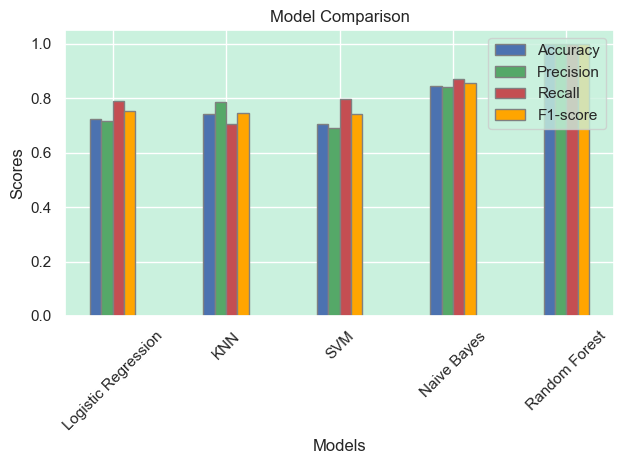

In [155]:

models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Random Forest']
accuracy = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
precision = [precision1, precision2, precision3, precision4, precision5]
recall = [recall1, recall2, recall3, recall4, recall5]
f1_score = [f1, f2, f3, f4, f5]

bar_width = 0.1

# Positions of bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]
r4 = [x + 3 * bar_width for x in r1]

# bar plot creation
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='orange', width=bar_width, edgecolor='grey', label='F1-score')

# Adding labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks([r + 1.5 * bar_width for r in range(len(models))], models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
